# Math Eval Results for Llama 3.2-1B-Instruct

In this notebook we explore the results generated by our evaluation for the Llama 3.2-1B-Instruct model on the MATH dataset.

In [2]:
from datasets import load_dataset

math_dataset_test = load_dataset('competition_math', split='test')
math_dataset_test.to_pandas().head()

Generating test split: 100%|██████████| 5000/5000 [00:00<00:00, 6491.06 examples/s]


,problem,level,type,solution
0,How many vertical asymptotes does the graph of...,Level 3,Algebra,The denominator of the rational function facto...
1,What is the positive difference between $120\%...,Level 1,Algebra,One hundred twenty percent of 30 is $120\cdot3...
2,Find $x$ such that $\lceil x \rceil + x = \dfr...,Level 4,Algebra,"First, we note that $x$ must be positive, sinc..."
3,Evaluate $i^5+i^{-25}+i^{45}$.,Level 5,Algebra,We have $i^5 = i^4\cdot i = 1\cdot (i) = i$. ...
4,"If $2^8=4^x$, what is the value of $x$?",Level 1,Algebra,Rewrite $4$ as $2^2$ to find $4^x=2^{2x}$. Si...


In [3]:
from huggingface_hub import login
import json

# Load token from config.json
with open("../config.json") as f:
    config = json.load(f)

hf_token = config["hf_token"]
login(hf_token)
eval_dataset_FROM_META = load_dataset("meta-llama/Llama-3.2-1B-Instruct-evals", "Llama-3.2-1B-Instruct-evals__math__details")

eval_dataset_FROM_META_df = eval_dataset_FROM_META['latest'].to_pandas()
eval_dataset_FROM_META_df.head()

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /Users/cayasryan/.cache/huggingface/token
Login successful


Generating latest split: 100%|██████████| 5000/5000 [00:00<00:00, 43120.13 examples/s]


,task_type,task_name,subtask_name,input_question,input_choice_list,input_final_prompts,input_correct_responses,output_prediction_text,output_parsed_answer,output_choice_completions,output_choice_negative_log_likelihoods,output_metrics,is_correct,input_question_hash,input_final_prompts_hash,benchmark_label,eval_config
0,Generative,math_chat_new,None,Find the imaginary part of \[(\cos12^\circ+i\s...,None,[<|start_header_id|>user<|end_header_id|>\n\nS...,[0],[## Step 1: Express the given expression in po...,0,None,None,"{'correct_format': 1.0, 'em': 1.0, 'em_maj1@1'...",True,5a2e4b5ae809e4fe13e8e25fedadc00309a38c663a0872...,[adcde01feac66b5a5a928be8804031ffddcb481ef73e4...,"MATH (4-shot, CoT)","{'max_gen_len': '5120', 'max_prompt_len': '307..."
1,Generative,math_chat_new,None,"What is the least, positive four-digit multipl...",None,[<|start_header_id|>user<|end_header_id|>\n\nS...,[1001],[## Step 1: Determine the smallest four-digit ...,1007,None,None,"{'correct_format': 1.0, 'em': 0.0, 'em_maj1@1'...",False,05be5a24c13a7f03934ca04c01bd595e757234538b3118...,[97745be9a6acd60858e258a46fbd4946e2904dd320c6c...,"MATH (4-shot, CoT)","{'max_gen_len': '5120', 'max_prompt_len': '307..."
2,Generative,math_chat_new,None,What is $(1 + 2 \cdot 3 \cdot 4 \cdot 5) \div ...,None,[<|start_header_id|>user<|end_header_id|>\n\nS...,[11],[## Step 1: Calculate the product inside the p...,21.909...,None,None,"{'correct_format': 1.0, 'em': 0.0, 'em_maj1@1'...",False,fc91c2faca18e68429a3ad12d1edcaf5eaa84183506aaf...,[2a840b3673983db48b20ed473579b710ad1f111764425...,"MATH (4-shot, CoT)","{'max_gen_len': '5120', 'max_prompt_len': '307..."
3,Generative,math_chat_new,None,"Two ropes, 18 meters in length and 24 meters i...",None,[<|start_header_id|>user<|end_header_id|>\n\nS...,[6],[## Step 1: Identify the key constraint\nThe p...,1,None,None,"{'correct_format': 1.0, 'em': 0.0, 'em_maj1@1'...",False,9e87e5f82a292976ff7a0503c803bb2fcbb026b1954d59...,[c7952d5c97db4006ebe8fba59bf41c9caa6dc35c59590...,"MATH (4-shot, CoT)","{'max_gen_len': '5120', 'max_prompt_len': '307..."
4,Generative,math_chat_new,None,"In the diagram below, lines $k$ and $\ell$ are...",None,[<|start_header_id|>user<|end_header_id|>\n\nS...,[60],[## Step 1: The problem provides a diagram wi...,30,None,None,"{'correct_format': 1.0, 'em': 0.0, 'em_maj1@1'...",False,30625ff210cf5a08933c65b91f4ff6b36fa1d03087ea1a...,[857c3d7d39e2cef68320fb00d5271b66676ba06244744...,"MATH (4-shot, CoT)","{'max_gen_len': '5120', 'max_prompt_len': '307..."


In [4]:
import os 

output_dir = "outputs"

results_0shot_file = os.path.join(output_dir, "results_0shot.json")
with open(results_0shot_file, "r") as f:
   results_0shot = json.load(f)

results_4shot_file = os.path.join(output_dir, "results_4shot.json")
with open(results_4shot_file, "r") as f:
   results_4shot = json.load(f)

In [5]:
import pandas as pd

# combine personal results with Meta's
overall_results = pd.DataFrame(data={"problem": results_0shot['problem'],
                                     "level": results_0shot['level'],
                                     "type": results_0shot['type'],
                                     "ground_truth": results_0shot['answer'],
                                     "0shot_solution": results_0shot['generated_text'],
                                     "4shot_solution": results_4shot['generated_text'],
                                     "0shot_answer": results_0shot['generated_answer'],
                                     "4shot_answer": results_4shot['generated_answer'],
                                     "0shot_em": results_0shot['exact_match'],
                                     "4shot_em": results_4shot['exact_match'],
                                     }
                                     )

eval_dataset_FROM_META_df_2 = eval_dataset_FROM_META_df[["input_question", "output_prediction_text", "output_parsed_answer", "is_correct"]]
eval_dataset_FROM_META_df_2.loc[:, 'is_correct'] = eval_dataset_FROM_META_df_2['is_correct'].astype(int)
eval_dataset_FROM_META_df_2 = eval_dataset_FROM_META_df_2.rename(columns={"input_question": "problem", "output_prediction_text": "meta_solution", "output_parsed_answer": "meta_answer", "is_correct": "meta_em"})

overall_results = pd.merge(overall_results, eval_dataset_FROM_META_df_2, on="problem")
overall_results = overall_results[["problem", "level", "type", "0shot_solution", "4shot_solution", "meta_solution", "ground_truth", "0shot_answer", "4shot_answer", "meta_answer", "0shot_em", "4shot_em", "meta_em"]]
overall_results.head()

/var/folders/dk/zhw4_3kn6cb029559dwjrmt40000gn/T/ipykernel_33352/3237092055.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0 0 ... 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  eval_dataset_FROM_META_df_2.loc[:, 'is_correct'] = eval_dataset_FROM_META_df_2['is_correct'].astype(int)


,problem,level,type,0shot_solution,4shot_solution,meta_solution,ground_truth,0shot_answer,4shot_answer,meta_answer,0shot_em,4shot_em,meta_em
0,How many vertical asymptotes does the graph of...,Level 3,Algebra,## Step 1: Factor the denominator\nThe denomin...,## Step 1: Factor the denominator\nTo find the...,[## Step 1: Factor the denominator\nTo find th...,2,-3,0,2,0,0,1
1,What is the positive difference between $120\%...,Level 1,Algebra,## Step 1: Calculate 120% of 30\nTo find 120% ...,## Step 1: Calculate 120% of 30\nTo find 120% ...,[## Step 1: Calculate 120% of 30\nTo find 120%...,10,10,10,10,1,1,1
2,Find $x$ such that $\lceil x \rceil + x = \dfr...,Level 4,Algebra,## Step 1: Understand the problem\nWe need to ...,## Step 1: Understand the problem\nWe are give...,[## Step 1: Understand the problem\nWe are giv...,\dfrac{9}{7},\dfrac{2}{7},\dfrac{23+2f}{14},1-n,0,0,0
3,Evaluate $i^5+i^{-25}+i^{45}$.,Level 5,Algebra,"## Step 1: Evaluate $i^5$\nSince $i^2 = -1$, w...",## Step 1: Recall the properties of the imagin...,[## Step 1: Recall the properties of the imagi...,i,i,1,1,1,0,0
4,"If $2^8=4^x$, what is the value of $x$?",Level 1,Algebra,## Step 1: Express both sides of the equation ...,## Step 1: Rewrite the equation with the same ...,[## Step 1: Rewrite the equation with the same...,4,4,2,2,1,0,0


## Explore discrepancies

In [11]:
from math_utils import *

# Parse meta solutions
parsed_meta_answers = []
for i in range(5000):
    answer = last_boxed_only_string(overall_results.loc[i, "meta_solution"][0])
    parsed_meta_answers.append(normalize_final_answer(remove_boxed(answer)) if answer else None)

overall_results["parsed_meta_answer"] = parsed_meta_answers

In [12]:
# Check None values
overall_results.isnull().sum()

problem                 0
level                   0
type                    0
0shot_solution          0
4shot_solution          0
meta_solution           0
ground_truth            0
0shot_answer          699
4shot_answer          345
meta_answer             0
0shot_em                0
4shot_em                0
meta_em                 0
parsed_meta_answer    341
dtype: int64

In [150]:
overall_results[overall_results['meta_answer'] == 'None']

,problem,level,type,0shot_solution,4shot_solution,meta_solution,ground_truth,0shot_answer,4shot_answer,meta_answer,0shot_em,4shot_em,meta_em
8,"Four distinct integers $a$, $b$, $c$ and $d$ h...",Level 4,Algebra,## Step 1: Analyze the given sums\nWe are give...,## Step 1: Analyze the given sums\nWe are giv...,[## Step 1: Analyze the given sums\nWe are gi...,461415,None,192612,None,0,0,0


In [13]:
# Check None answers for 0shot
overall_results[overall_results['4shot_answer'].isnull() & overall_results['parsed_meta_answer'].isnull()]

,problem,level,type,0shot_solution,4shot_solution,meta_solution,ground_truth,0shot_answer,4shot_answer,meta_answer,0shot_em,4shot_em,meta_em,parsed_meta_answer
117,The rightmost non-zero digit in \begin{align*...,Level 5,Algebra,"## Step 1: First, we need to calculate the val...",## Step 1: We are given a large expression an...,[## Step 1: We are given a large expression a...,"(2,12)",None,None,## Step 1: We are given a large expression an...,0,0,0,None
241,"Alex, Bob, Camille, and Danielle's mothers are...",Level 4,Algebra,## Step 1: Define the variables\nLet's denote ...,## Step 1: Define the variables\nLet's define ...,[## Step 1: Define the variables\nLet's define...,1,\frac{2}{7},None,## Step 1: Define the variables\nLet's define ...,0,0,0,None
339,"If $f(c)=\frac{3}{2c-3}$, find $\frac{kn^2}{lm...",Level 5,Algebra,"## Step 1: To solve the given problem, we firs...",## Step 1: Understand the problem\nWe are give...,[## Step 1: Understand the problem\nWe are giv...,9,None,None,## Step 1: Understand the problem\nWe are give...,0,0,0,None
447,Let $$x={4\over{(\sqrt5+1)(\root 4\of5+1)(\roo...,Level 5,Algebra,## Step 1: Simplify the expression for x\nWe s...,## Step 1: Simplify the expression for x\nWe s...,[## Step 1: Simplify the expression for x\nWe ...,125,None,None,## Step 1: Simplify the expression for x\nWe s...,0,0,0,None
644,The difference between the squares of two diff...,Level 4,Algebra,## Step 1: Identify the problem\nThe problem i...,## Step 1: Identify the possible prime numbers...,[## Step 1: Identify the problem and understa...,1943,None,None,## Step 1: Identify the problem and understan...,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,Let $\mathbf{a}$ and $\mathbf{b}$ be two non-z...,Level 2,Precalculus,"## Step 1: To solve this problem, we first ne...",## Step 1: Recall the vector triple product id...,[## Step 1: Recall the vector triple product i...,\sqrt{3},\frac{3-3\sqrt{5}}{2},None,## Step 1: Recall the vector triple product id...,0,0,0,None
4953,Simplify $$2\cos^2(\log(2009)i)+i\sin(\log(403...,Level 5,Precalculus,## Step 1: Express the given expression in ter...,## Step 1: Apply De Moivre's Theorem\nWe can s...,[## Step 1: Apply De Moivre's Theorem\nWe can ...,\frac{4036082}{4036081},None,None,## Step 1: Apply De Moivre's Theorem\nWe can s...,0,0,0,None
4967,"In triangle $ABC,$ $a = 2,$ $b = 3,$ and $c = ...",Level 2,Precalculus,## Step 1: Use the Law of Cosines to find the ...,## Step 1: Recall the Law of Sines\nThe Law of...,[## Step 1: Recall the Law of Sines\nThe Law o...,180,\frac{17}{16},None,## Step 1: Recall the Law of Sines\nThe Law of...,0,0,0,None
4980,"For positive real numbers $x$ and $y,$ the equ...",Level 5,Precalculus,"## Step 1: To solve the given equation, we st...","## Step 1: To solve the given equation, we st...","[## Step 1: To solve the given equation, we s...","(3,-3,1)","\le(\frac{3}{\sqrt{10}},\frac{3}{\sqrt{10}},0\...",None,"## Step 1: To solve the given equation, we st...",0,0,0,None


In [158]:
idx = 4979
print("Problem:",overall_results.iloc[idx,:]['problem'])
print("Solution:\n",overall_results.iloc[idx,:]['4shot_solution'])

Problem: The matrix $\mathbf{M}$ satisfies
\[\mathbf{M} \begin{pmatrix} 2 \\ 1 \end{pmatrix} = \begin{pmatrix} 5 \\ 4 \end{pmatrix} \quad \text{and} \quad \mathbf{M} \begin{pmatrix} 3 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 2 \end{pmatrix} \quad.\]Find $\det \mathbf{M}.$
Solution:
 ## Step 1: Express the matrix equation as a system of linear equations
We can express the matrix equation $\mathbf{M} \begin{pmatrix} 2 \\ 1 \end{pmatrix} = \begin{pmatrix} 5 \\ 4 \end{pmatrix}$ and $\mathbf{M} \begin{pmatrix} 3 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$ as a system of linear equations:
\[\begin{pmatrix} 2 & 1 \\ 3 & 0 \end{pmatrix} \begin{pmatrix} m_1 \\ m_2 \end{pmatrix} = \begin{pmatrix} 5 \\ 4 \end{pmatrix}\]
and
\[\begin{pmatrix} 2 & 1 \\ 3 & 0 \end{pmatrix} \begin{pmatrix} m_1 \\ m_2 \end{pmatrix} = \begin{pmatrix} 1 \\ 2 \end{pmatrix}.\]

## Step 2: Solve the system of linear equations
To solve the system of linear equations, we can use the method of substitution or 

In [157]:
print("Problem:",overall_results.iloc[idx,:]['problem'])
print("Solution:\n",overall_results.iloc[idx,:]['meta_solution'][0])

Problem: What is the least possible value of the sum $|x - 1| + |x - 1.5| + |x - 2|$?
Solution:
 ## Step 1: Analyze the expression
We need to find the least possible value of the sum $|x - 1| + |x - 1.5| + |x - 2|$. This expression involves absolute values, which means the value inside the absolute value can be either positive or negative.

## Step 2: Consider different cases for x
To find the least possible value, we need to consider different cases for the value of x. Let's consider three cases: x < 1, 1 ≤ x < 1.5, and x ≥ 1.5.

## Step 3: Case 1: x < 1
In this case, the expression becomes -(x - 1) - (x - 1.5) - (x - 2) = -3x + 4. Since x < 1, the minimum value of -3x + 4 is when x = 1, which is 1.

## Step 4: Case 2: 1 ≤ x < 1.5
In this case, the expression becomes (x - 1) - (x - 1.5) - (x - 2) = -0.5. Since x < 1.5, the minimum value of -0.5 is when x = 1.5, which is 1.5.

## Step 5: Case 3: x ≥ 1.5
In this case, the expression becomes (x - 1) + (x - 1.5) - (x - 2) = 0. Since x ≥ 1

In [58]:
overall_results[overall_results['4shot_em'] != overall_results['meta_em']]['type'].value_counts()

type
Algebra                   124
Prealgebra                 78
Intermediate Algebra       75
Precalculus                56
Number Theory              49
Geometry                   44
Counting & Probability     42
Name: count, dtype: int64

In [57]:
# Similarity between 0-shot, 4-shot, and meta scores
similarity_0shot_4shot = sum(overall_results['0shot_em'] == overall_results['4shot_em']) / 5000
similarity_0shot_meta = sum(overall_results['0shot_em'] == overall_results['meta_em']) / 5000
similarity_4shot_meta = sum(overall_results['4shot_em'] == overall_results['meta_em']) / 5000

print(f"Similarity between 0-shot and 4-shot: {similarity_0shot_4shot}")
print(f"Similarity between 0-shot and Meta: {similarity_0shot_meta}")
print(f"Similarity between 4-shot and Meta: {similarity_4shot_meta}")

Similarity between 0-shot and 4-shot: 0.8272
Similarity between 0-shot and Meta: 0.8128
Similarity between 4-shot and Meta: 0.9064


In [163]:
from math_utils import *

fourshot_equiv = 0
for i in range(5000):
    if overall_results["meta_answer"][i] is None or overall_results["4shot_answer"][i] is None:
        continue
    fourshot_equiv += int(overall_results["meta_answer"][i].strip() == overall_results["4shot_answer"][i].strip() or is_equiv(overall_results["meta_answer"], overall_results["4shot_answer"]))

print(f"4-shot and Meta answers are equivalent in {fourshot_equiv} cases.")

4-shot and Meta answers are equivalent in 2241 cases.


In [165]:
equiv = 0
for i in range(5000):
    if overall_results["0shot_answer"][i] is None or overall_results["4shot_answer"][i] is None:
        continue
    equiv += int(overall_results["0shot_answer"][i].strip() == overall_results["4shot_answer"][i].strip() or is_equiv(overall_results["0shot_answer"], overall_results["4shot_answer"]))

print(f"4-shot and 0-shot answers are equivalent in {equiv} cases.")

4-shot and 0-shot answers are equivalent in 1445 cases.


## Investigate Consistency of Model Output

In [80]:
idx = 2
print("Problem:",overall_results.iloc[idx,:]['problem'])
print("Meta's Solution:\n",overall_results.iloc[idx,:]['meta_solution'][0])
print("4-shot Solution:\n",overall_results.iloc[idx,:]['4shot_solution'])
print("0-shot Solution:\n",overall_results.iloc[idx,:]['0shot_solution'])

Problem: Find $x$ such that $\lceil x \rceil + x = \dfrac{23}{7}$. Express $x$ as a common fraction.
Meta's Solution:
 ## Step 1: Understand the problem
We are given an equation involving the ceiling function, which rounds a number up to the nearest integer. The equation is $\lceil x \rceil + x = \dfrac{23}{7}$, and we need to find the value of $x$ as a common fraction.

## Step 2: Recognize that $\lceil x \rceil$ is an integer
Since $\lceil x \rceil$ is the ceiling function, it rounds $x$ up to the nearest integer. This means that $\lceil x \rceil$ is always an integer.

## Step 3: Express $x$ as the sum of an integer and a fraction
Let's express $x$ as the sum of an integer $n$ and a fraction $f$, where $0 \leq f < 1$. Then, we can write $x = n + f$.

## Step 4: Substitute $x = n + f$ into the equation
Substituting $x = n + f$ into the equation $\lceil x \rceil + x = \dfrac{23}{7}$, we get $\lceil n + f \rceil + n + f = \dfrac{23}{7}$.

## Step 5: Simplify the equation
Since $\lceil 

In [112]:
# Add the instruction (and sample problems if few shot) before each problem
cot_prompt = "<|start_header_id|>user<|end_header_id|>\n\nSolve the following math problem efficiently and clearly:\n\n- For simple problems (2 steps or fewer):\nProvide a concise solution with minimal explanation.\n\n- For complex problems (3 steps or more):\nUse this step-by-step format:\n\n## Step 1: [Concise description]\n[Brief explanation and calculations]\n\n## Step 2: [Concise description]\n[Brief explanation and calculations]\n\n...\n\nRegardless of the approach, always conclude with:\n\nTherefore, the final answer is: $\\boxed{answer}$. I hope it is correct.\n\nWhere [answer] is just the final number or expression that solves the problem.\n\n"
problems = ["Find the domain of the expression $\\frac{\\sqrt{x-2}}{\\sqrt{5-x}}$.",
            "If $\\det \\mathbf{A} = 2$ and $\\det \\mathbf{B} = 12,$ then find $\\det (\\mathbf{A} \\mathbf{B}).$",
            "Terrell usually lifts two 20-pound weights 12 times. If he uses two 15-pound weights instead, how many times must Terrell lift them in order to lift the same total weight?",
            "If the system of equations\n\n\\begin{align*}\n6x-4y&=a,\\\\\n6y-9x &=b.\n\\end{align*}has a solution $(x, y)$ where $x$ and $y$ are both nonzero, find $\\frac{a}{b},$ assuming $b$ is nonzero."]
solutions = ["## Step 1: Consider the expression inside the first square root\nThe expression inside the first square root is $x-2$, and it must be non-negative. This means that $x-2 \\ge 0$, which simplifies to $x \\ge 2$.\n\n## Step 2: Consider the expression inside the second square root\nThe expression inside the second square root is $5-x$, and it must be non-negative. This means that $5-x \\ge 0$, which simplifies to $x \\le 5$.\n\n## Step 3: Consider the denominator of the expression\nThe denominator of the expression is $\\sqrt{5-x}$, and it cannot be equal to zero. This means that $5-x>0$, which simplifies to $x<5$.\n\n## Step 4: Combine the results from the previous steps\nCombining the results from the previous steps, we have $x \\ge 2$ and $x < 5$. This means that the domain of the expression is $[2,5)$.\n\nThe final answer is: $\\boxed{[2,5)}$. I hope it is correct.",
             "## Step 1:  Understand the properties of determinants\nWe know that the determinant of a product of two matrices is equal to the product of their determinants.\n\n## Step 2: Apply the property to the given matrices\nUsing the property, we can write $\\det (\\mathbf{A} \\mathbf{B}) = (\\det \\mathbf{A})(\\det \\mathbf{B})$.\n\n## Step 3: Substitute the given values\nWe are given that $\\det \\mathbf{A} = 2$ and $\\det \\mathbf{B} = 12$. Substituting these values, we get $\\det (\\mathbf{A} \\mathbf{B}) = (2)(12)$.\n\n## Step 4: Calculate the final answer\nEvaluating the product, we find that $\\det (\\mathbf{A} \\mathbf{B}) = 24$.\n\nThe final answer is: $\\boxed{24}$. I hope it is correct.",
             "## Step 1: Calculate the total weight Terrell lifts with two 20-pound weights\nTerrell lifts two 20-pound weights 12 times, so the total weight he lifts is $2 \\cdot 12 \\cdot 20 = 480$ pounds.\n\n## Step 2: Calculate the total weight Terrell lifts with two 15-pound weights for n times\nIf Terrell lifts two 15-pound weights instead for $n$ times, he will lift a total of $2 \\cdot 15 \\cdot n = 30n$ pounds of weight.\n\n## Step 3: Equate the total weight lifted with 15-pound weights to 480 pounds and solve for n\nEquating the total weight lifted with 15-pound weights to 480 pounds, we can solve for $n$: $30n = 480$.\n\n## Step 4: Solve for n\nTo solve for $n$, divide both sides by 30: $n = \\frac{480}{30}$.\n\n## Step 5: Calculate the value of n\nThe value of $n$ is $\\frac{480}{30} = 16$.\n\nThe final answer is: $\\boxed{16}$. I hope it is correct.",
             "## Step 1: Understand the problem\nWe are given a system of linear equations with two variables, $x$ and $y$, and two constants, $a$ and $b$. Our goal is to find the ratio $\\frac{a}{b}$, assuming $b$ is nonzero.\n\n## Step 2: Multiply the first equation by a suitable factor\nWe multiply the first equation by $-\\frac{3}{2}$ to obtain an equation with the same coefficients for $y$ as the second equation: $$-\\frac{3}{2}(6x-4y)=a\\Rightarrow 6y-9x=-\\frac{3}{2}a.$$\n\n## Step 3: Equate the right-hand sides of the two equations\nSince we know that $6y-9x=b$ from the second equation, we can equate the right-hand sides of the two equations to obtain $$-\\frac{3}{2}a=b.$$\n\n## Step 4: Solve for the ratio $\\frac{a}{b}$\nFinally, we can solve for the ratio $\\frac{a}{b}$ by dividing both sides of the equation by $b$, giving us $$\\frac{a}{b}=-\\frac{2}{3}.$$\n\nThe final answer is: $\\boxed{-\\frac{2}{3}}. I hope it is correct."]

def get_fixed_prompt(cot_prompt, few_shot = False, problems = None, solutions = None):
    "question set contains 'problem', 'solution', 'type', and 'level'"
    if few_shot and (problems is None or solutions is None):
        raise ValueError("Few shot prompts require sample problems and answers")
    
    prompt = cot_prompt

    if few_shot:
        # Concatenate problems and answers with the specified formatting
        for i in range(len(problems)): 
            prompt += f"Problem: {problems[i]}<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n{solutions[i]}<|eot_id|>"
            prompt += cot_prompt

    return prompt

# Get fixed prompt
fixed_prompt = get_fixed_prompt(cot_prompt, few_shot=True, problems=problems, solutions=solutions)

In [109]:
from transformers import LlamaForCausalLM, PreTrainedTokenizerFast
import os
import torch

# Set-up CUDA device
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
# use a specific GPU
os.environ["CUDA_VISIBLE_DEVICES"]="4"

# Use GPU for inference
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the device being used
print(f"Using device: {device}")

# Check the GPU name
if device.type == 'cuda':
    gpu_name = torch.cuda.get_device_name(0)  # 0 because CUDA_VISIBLE_DEVICES=4 means GPU 4 is now 0
    print("Using GPU:", gpu_name)

# Paths to model and tokenizer
model_dir = "../../../../../../llm/llama/Llama-3.2-1B-Instruct"

# Load tokenizer and model
tokenizer = PreTrainedTokenizerFast.from_pretrained(model_dir, padding_side="left")
model = LlamaForCausalLM.from_pretrained(model_dir)

# Set the eos_token as the padding token
tokenizer.pad_token = tokenizer.eos_token

# Move the model to the GPU
model.to(device)

Using device: cuda
Using GPU: NVIDIA A100-SXM4-40GB


LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 2048)
    (layers): ModuleList(
      (0-15): 16 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=512, bias=False)
          (v_proj): Linear(in_features=2048, out_features=512, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (up_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (down_proj): Linear(in_features=8192, out_features=2048, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
      )
    )
    (norm):

In [135]:
generate_config = {
    'max_new_tokens': 5120,
    'num_return_sequences': 1,
    'output_scores': False,
    'do_sample': False,  # since temperature, top_k, top_p are 0
    'top_p': None,
    'temperature': None,
    'top_k': None
}

idx = 2
problem = overall_results.iloc[idx,:]['problem']

model.eval()

with torch.no_grad():
    input = fixed_prompt + "Problem: " + problem + "<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n"
    input_tokenized = tokenizer(input, return_tensors="pt").input_ids.to(device)
    output = model.generate(
        input_tokenized,
        **generate_config
    )

    input_length = input_tokenized.shape[1]
    new_tokens = output[0][input_length:]
    output_text = tokenizer.decode(new_tokens, skip_special_tokens=True)
    print("Generated Solution:\n", output_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Generated Solution:
 ## Step 1: Understand the problem
We are given an equation involving the ceiling function, which rounds a number up to the nearest integer. The equation is $\lceil x \rceil + x = \dfrac{23}{7}$, and we need to find the value of $x$ as a common fraction.

## Step 2: Recognize that $\lceil x \rceil$ is an integer
Since $\lceil x \rceil$ is the ceiling function, it rounds $x$ up to the nearest integer. This means that $\lceil x \rceil$ is always an integer.

## Step 3: Express $x$ as the sum of an integer and a fraction
Let's express $x$ as the sum of an integer $n$ and a fraction $\frac{f}{7}$, where $f$ is an integer. Then, we have $\lceil x \rceil = n$ and $x = n + \frac{f}{7}$.

## Step 4: Substitute $x$ into the original equation
Substituting $x = n + \frac{f}{7}$ into the original equation, we get $\lceil n + \frac{f}{7} \rceil + n + \frac{f}{7} = \dfrac{23}{7}$.

## Step 5: Simplify the equation
Since $\lceil n + \frac{f}{7} \rceil = n + 1$ (because $n$ is an i

## Score per level and Type

In [70]:
# percent correct per level
print(overall_results.groupby('level')['0shot_em'].mean())
print(overall_results.groupby('level')['4shot_em'].mean())
print(overall_results.groupby('level')['meta_em'].mean())

level
Level 1    0.654462
Level 2    0.476510
Level 3    0.367816
Level 4    0.224876
Level 5    0.117069
Name: 0shot_em, dtype: float64
level
Level 1    0.663616
Level 2    0.495526
Level 3    0.359859
Level 4    0.224053
Level 5    0.092145
Name: 4shot_em, dtype: float64
level
Level 1    0.661327
Level 2    0.483221
Level 3    0.352785
Level 4    0.222405
Level 5    0.099698
Name: meta_em, dtype: float64


In [71]:
# percent correct per type
print(overall_results.groupby('type')['0shot_em'].mean())
print(overall_results.groupby('type')['4shot_em'].mean())
print(overall_results.groupby('type')['meta_em'].mean())

type
Algebra                   0.471778
Counting & Probability    0.259494
Geometry                  0.267223
Intermediate Algebra      0.152824
Number Theory             0.229630
Prealgebra                0.442021
Precalculus               0.179487
Name: 0shot_em, dtype: float64
type
Algebra                   0.437237
Counting & Probability    0.276371
Geometry                  0.254697
Intermediate Algebra      0.143965
Number Theory             0.250000
Prealgebra                0.448909
Precalculus               0.194139
Name: 4shot_em, dtype: float64
type
Algebra                   0.442291
Counting & Probability    0.280591
Geometry                  0.254697
Intermediate Algebra      0.140642
Number Theory             0.233333
Prealgebra                0.442021
Precalculus               0.190476
Name: meta_em, dtype: float64


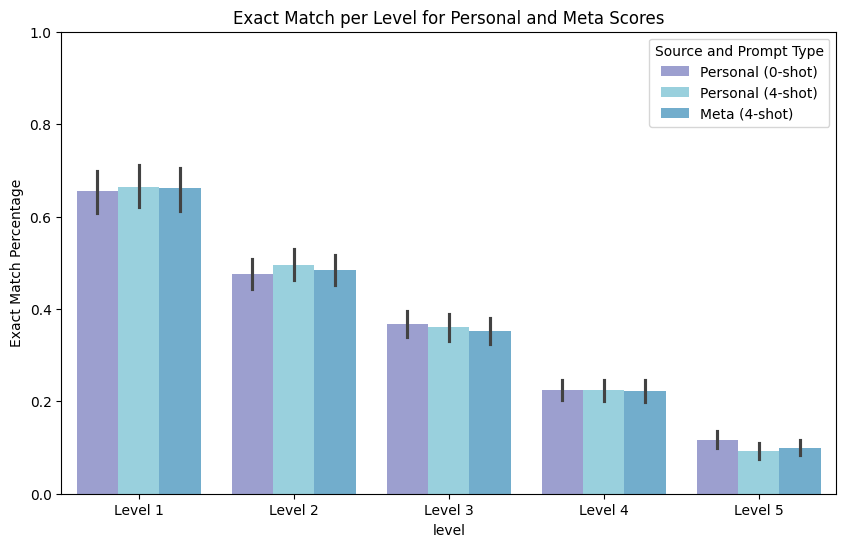

In [94]:
# plot exact match per level for 0-shot 4-shot and meta scores
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to long format
melted_results = pd.melt(overall_results, id_vars=['level'], value_vars=['0shot_em', '4shot_em', 'meta_em'],
                         var_name='Source and Prompt Type', value_name='Exact Match Percentage')

# Rename the shot types for better readability
melted_results['Source and Prompt Type'] = melted_results['Source and Prompt Type'].replace({
    '0shot_em': 'Personal (0-shot)',
    '4shot_em': 'Personal (4-shot)',
    'meta_em': 'Meta (4-shot)'
})

# Define a custom color palette
custom_palette = {
    'Personal (0-shot)': '#9397d8',  # Purple
    'Personal (4-shot)': '#8ed7e8',  # Sky Blue
    'Meta (4-shot)': '#63b1db'      # Blue
}

# Ensure the levels are ordered from 1 to 5
melted_results['level'] = pd.Categorical(melted_results['level'], categories=['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'], ordered=True)

# Plot the combined bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='level', y='Exact Match Percentage', hue='Source and Prompt Type', data=melted_results, palette=custom_palette)
plt.ylim(0, 1)
plt.title('Exact Match per Level for Personal and Meta Scores')
plt.show()

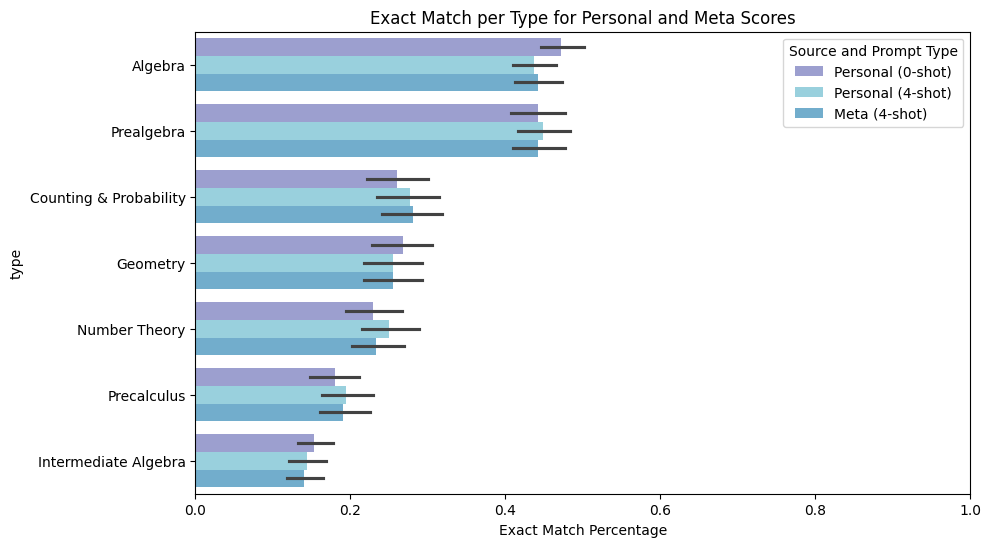

In [98]:
# Melt the DataFrame to long format
melted_results = pd.melt(overall_results, id_vars=['type'], value_vars=['0shot_em', '4shot_em', 'meta_em'],
                         var_name='Source and Prompt Type', value_name='Exact Match Percentage')

# Rename the shot types for better readability
melted_results['Source and Prompt Type'] = melted_results['Source and Prompt Type'].replace({
    '0shot_em': 'Personal (0-shot)',
    '4shot_em': 'Personal (4-shot)',
    'meta_em': 'Meta (4-shot)'
})

# Define a custom color palette
custom_palette = {
    'Personal (0-shot)': '#9397d8',  # Purple
    'Personal (4-shot)': '#8ed7e8',  # Sky Blue
    'Meta (4-shot)': '#63b1db'      # Blue
}

# Order categories
melted_results['type'] = pd.Categorical(melted_results['type'], categories=['Algebra', 'Prealgebra', 'Counting & Probability', 'Geometry', 'Number Theory', 'Precalculus', 'Intermediate Algebra'], ordered=True)


# Plot the combined bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Exact Match Percentage', y='type', hue='Source and Prompt Type', data=melted_results, palette=custom_palette)
plt.xlim(0, 1)
plt.title('Exact Match per Type for Personal and Meta Scores')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.show()